In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [2]:
out_f = 'Results/csRNATSS/Brain_trim_CHBrain_5GRO_JHS1036_SD_ATGTCA_S51_L003_R1_001.fastq_trim_CHBrain_GRO_JHS1029_SD_CACCGG_S44_L003_R1_001.fastq'

In [3]:
## Load results of called peaks, tss, and exons
tss = pd.read_csv( out_f + '.tss.txt',sep='\t',index_col=0)

annexon = pd.read_csv( out_f + '.annexons.txt',sep='\t',index_col=0)
anntss = pd.read_csv( out_f + '.anntss.txt',sep='\t',index_col=0)


/home/isshamie/software/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tss.head()

,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_13-1,picr_13,30535313,30535463,+,292098.9,0.999,292098.87,909.25,19.42,tssAntisense,8.314966,13.378980,19.03,0.00,0.00,13.399647156684
picr_21-1,picr_21,111521,111671,-,50902.3,0.997,50902.28,343.80,0.88,other,7.177058,12.485110,0.00,0.00,0.59,12.6356693798104
picr_56-1,picr_56,12601780,12601930,+,47174.2,0.998,47174.18,164.97,0.49,other,8.091576,12.440190,41.63,0.00,0.10,9.89281390825959
picr_3-1,picr_3,42026399,42026549,-,37742.1,0.905,37742.12,103.27,8.44,tss,8.406273,11.165055,0.00,0.00,0.00,12.2041936100303
picr_74-1,picr_74,4078025,4078175,-,29536.9,0.928,29536.90,561.67,0.00,tss,5.696639,11.850621,10.71,0.00,4.41,10.6248838419443


In [5]:
annexon.head()

,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_8-2,picr_8,29065702,29065852,-,23006.2,0.998,23006.19,897.92,10.50,otherExon,4.666996,10.280783,2642.02,143.57,1.67,3.118449
picr_93-1,picr_93,5056762,5056912,+,13836.2,0.999,13836.23,27.71,0.78,otherExon,8.598741,10.622776,33.70,17.63,1.08,8.375022
picr_1500-1,picr_1500,5932,6082,+,7389.6,0.999,7350.32,10.07,10.20,otherExon,8.669636,8.659294,0.00,0.00,1.86,9.845161
picr_0-1,picr_0,64458634,64458784,+,7011.7,0.646,7011.69,52.89,0.69,otherExon,6.849058,9.657835,24.98,3.78,1.28,7.733672
picr_93-4,picr_93,880986,881136,-,5305.5,0.404,5298.72,6.30,10.20,otherExon,8.535661,8.187738,32.12,1.26,0.69,7.047355


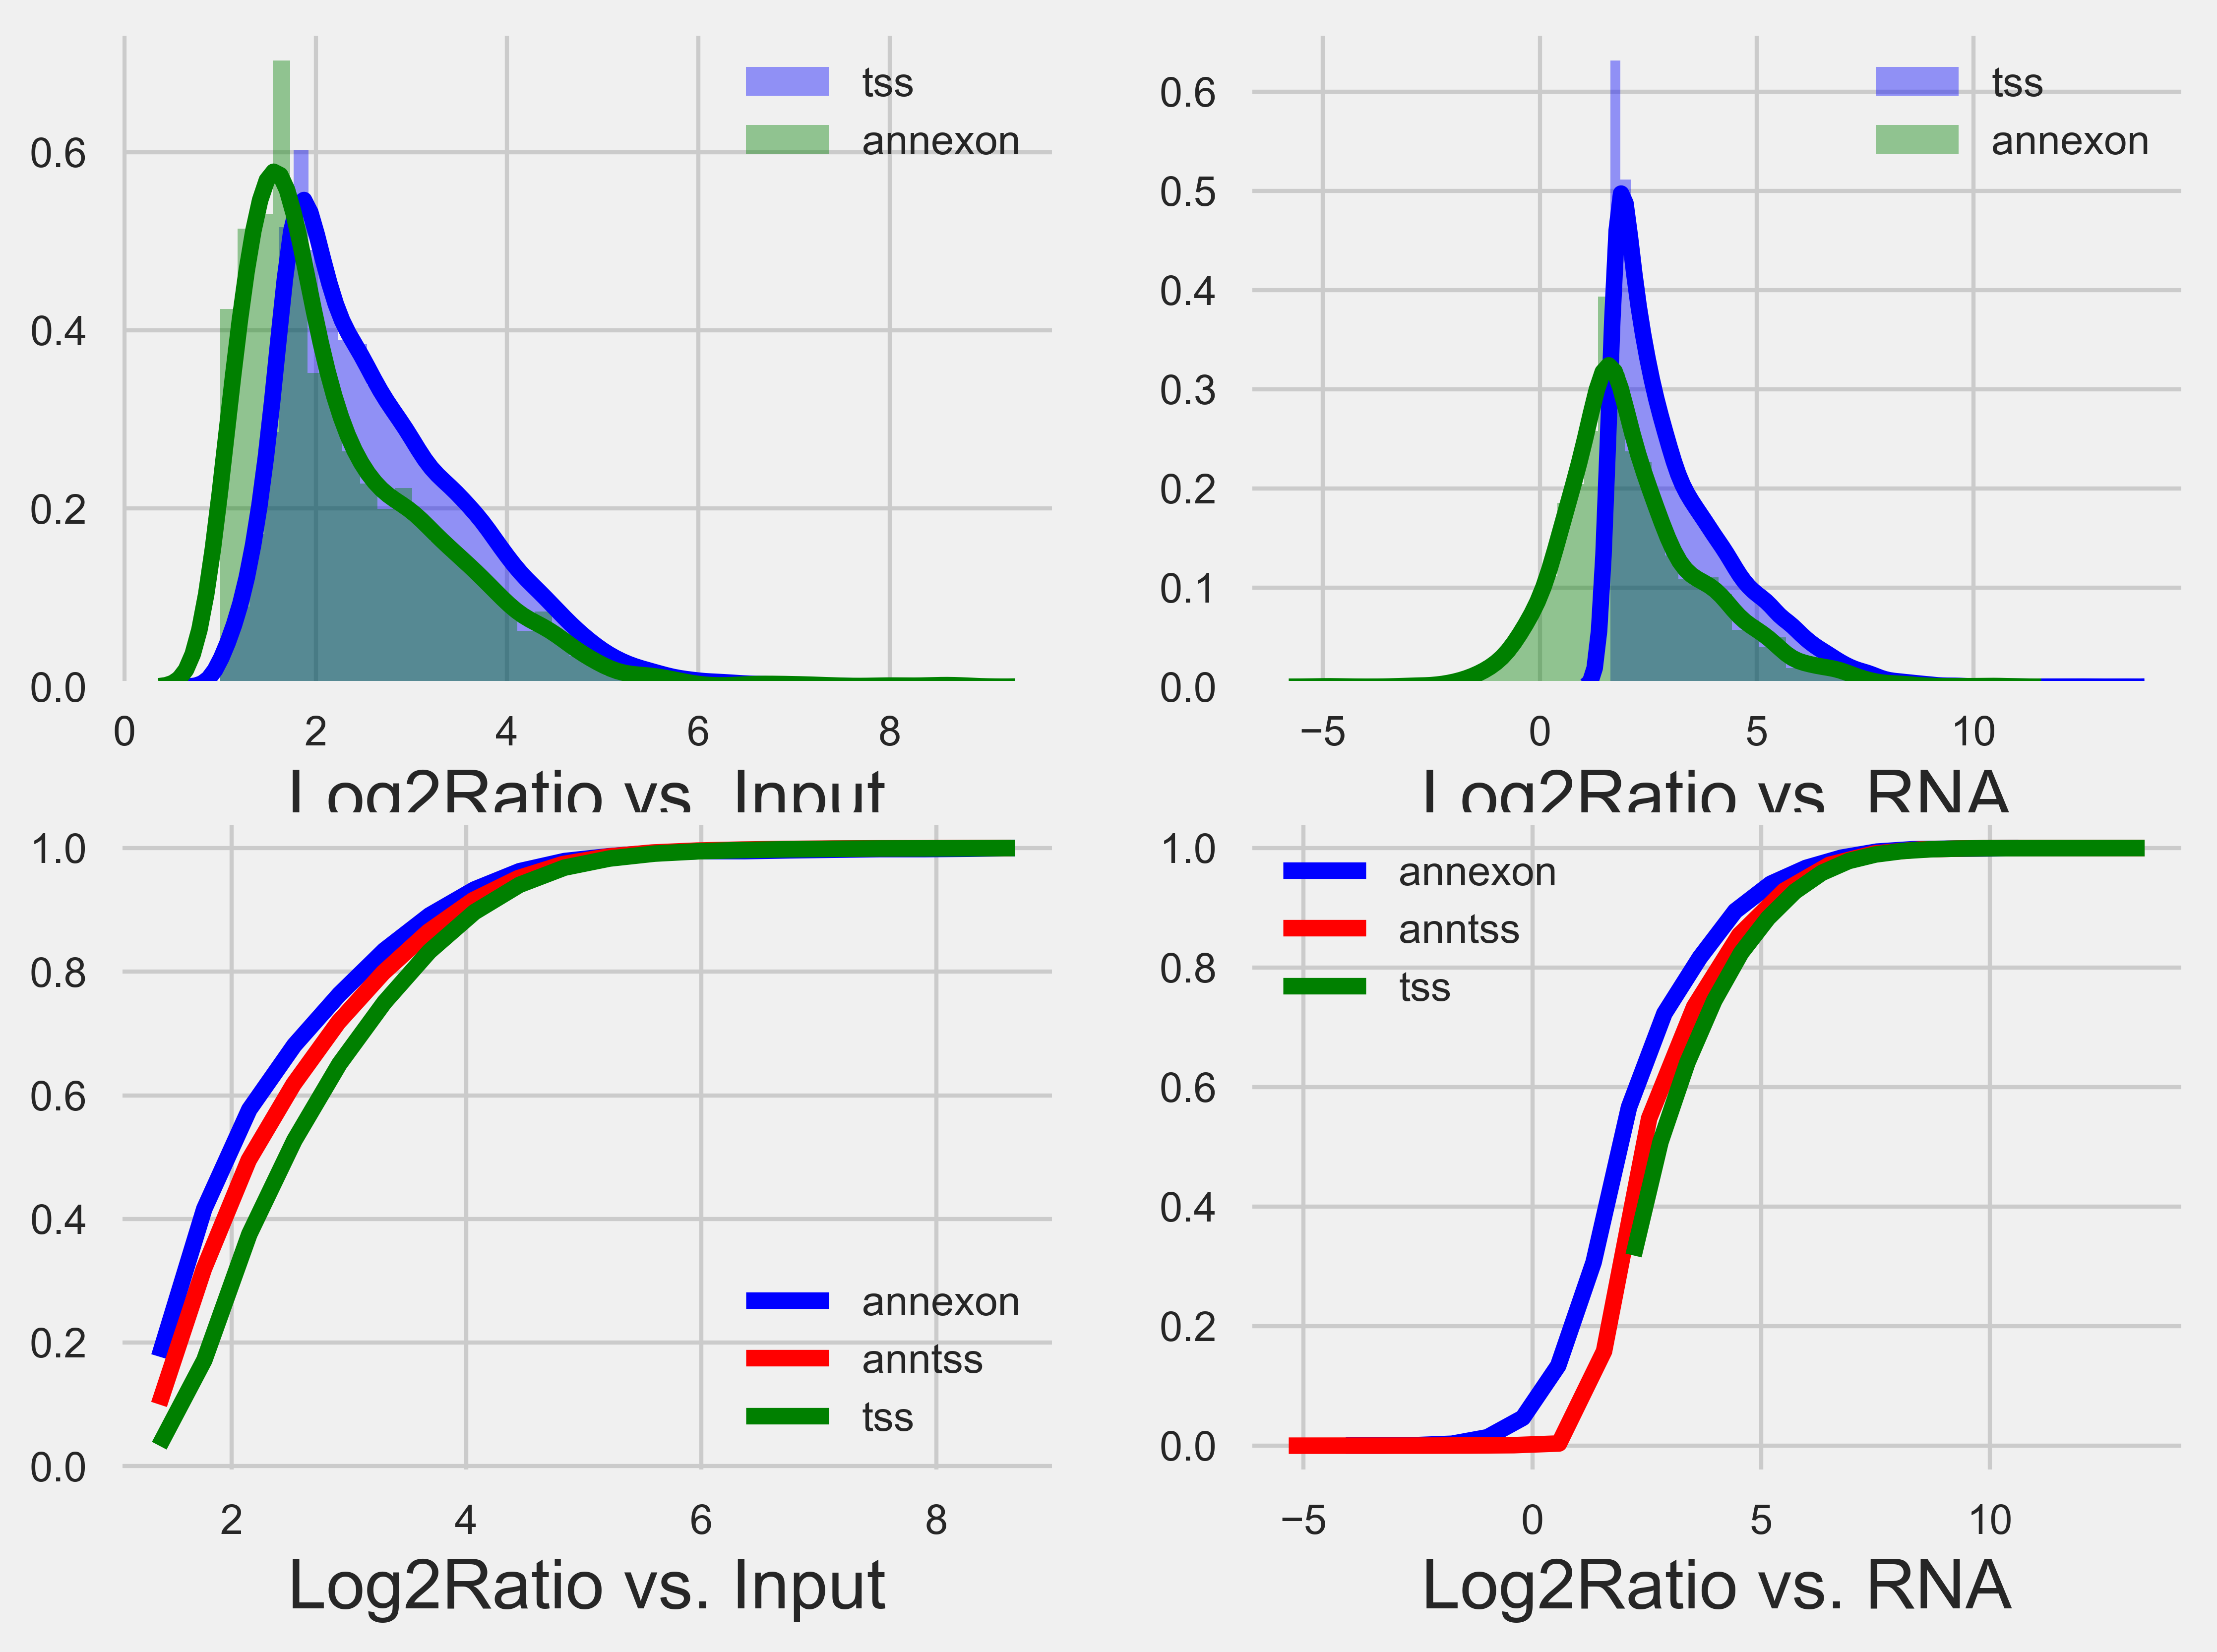

In [6]:
f = plt.figure(figsize=(8,6),dpi=300)
ax = plt.subplot(2,2,1)
sns.distplot(tss['Log2Ratio vs. Input'],label='tss')
sns.distplot(annexon['Log2Ratio vs. Input'],color='g',label='annexon')
plt.legend()
ax = plt.subplot(2,2,2)
sns.distplot(tss['Log2Ratio vs. RNA'],label='tss')
sns.distplot(annexon['Log2Ratio vs. RNA'],color='g',label='annexon')
plt.legend()

ax = plt.subplot(2,2,3)
num_bins = 20

counts, bin_edges = np.histogram (annexon['Log2Ratio vs. Input'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],label='annexon')

counts, bin_edges = np.histogram (anntss['Log2Ratio vs. Input'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='r',label='anntss')

counts, bin_edges = np.histogram (tss['Log2Ratio vs. Input'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='g',label='tss')
plt.xlabel('Log2Ratio vs. Input')
plt.legend()



ax = plt.subplot(2,2,4)
num_bins = 20

counts, bin_edges = np.histogram (annexon['Log2Ratio vs. RNA'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],label='annexon')

counts, bin_edges = np.histogram (anntss['Log2Ratio vs. RNA'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='r',label='anntss')

counts, bin_edges = np.histogram (tss['Log2Ratio vs. RNA'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='g',label='tss')
plt.xlabel('Log2Ratio vs. RNA')
plt.legend()